# Welcome to the first lesson for Python for Data Analysis Coures

### Today we will discuss Data Wrangling that includes:

1) Data Assessing and Exploring

2) Data Cleaning includes:

    a) Missing Values includes:
        a.1) Fillna: Fill Null values
        a.2) Dropna: Drop Rows with Null values
        a.3) Using mean, median, and mode to Fill Null values
    
    b) Duplicated Rows
    
    c) Incorrect Data Type
    
    d) Incorrect Column Name

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

### Data Assessing

In [2]:
# load Breast cancer data

data = pd.read_csv("C:\\Users\\ycc\\Run Code\\Other Code\\practpy\\data1.csv", index_col = False)

In [3]:
data.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [6]:
data.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


# data cleaning

###### incorrect data type, missing data, duplicate data

### Missing Data

In [7]:
#Check for Null Values

data.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [8]:
# Using mode to fill null values

rating_mode = data['rating'].mode()[0]

In [9]:
data['rating'].fillna(rating_mode, inplace = True)

In [10]:
data.isnull().sum()

name           0
rating         0
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [11]:
data['released'].mode()

0    February 14, 1986 (United States)
1         May 17, 2019 (United States)
2      October 4, 1991 (United States)
dtype: object

In [12]:
# Drop null values

data.dropna(subset=['released'], axis = 0, inplace = True)

In [13]:
data.isnull().sum()

name           0
rating         0
genre          0
year           0
released       0
score          3
votes          3
director       0
writer         3
star           1
country        1
budget      2169
gross        187
company       15
runtime        2
dtype: int64

In [14]:
mean_score =round(data['score'].mean(),1)

In [15]:
# Using mean to fill null values

data['score'].fillna(mean_score, inplace = True)

In [16]:
data.isnull().sum()

name           0
rating         0
genre          0
year           0
released       0
score          0
votes          3
director       0
writer         3
star           1
country        1
budget      2169
gross        187
company       15
runtime        2
dtype: int64

In [17]:
mean_vote =round(data['votes'].mean(),2)

In [18]:
# Using mean to fill null values

data['votes'].fillna(mean_vote, inplace = True)

In [19]:
data.isnull().sum()

name           0
rating         0
genre          0
year           0
released       0
score          0
votes          0
director       0
writer         3
star           1
country        1
budget      2169
gross        187
company       15
runtime        2
dtype: int64

In [20]:
#Drop Null Values

data.dropna(subset=['writer'], axis = 0, inplace = True)

In [21]:
data.isnull().sum()

name           0
rating         0
genre          0
year           0
released       0
score          0
votes          0
director       0
writer         0
star           1
country        1
budget      2166
gross        187
company       15
runtime        2
dtype: int64

In [22]:
#Drop Null Values

data.dropna(subset=['star'], axis = 0, inplace = True)

In [23]:
data.isnull().sum()

name           0
rating         0
genre          0
year           0
released       0
score          0
votes          0
director       0
writer         0
star           0
country        1
budget      2166
gross        186
company       15
runtime        2
dtype: int64

In [24]:
#Drop Null Values

data.dropna(subset=['country'], axis = 0, inplace = True)

In [25]:
data.isnull().sum()

name           0
rating         0
genre          0
year           0
released       0
score          0
votes          0
director       0
writer         0
star           0
country        0
budget      2166
gross        186
company       15
runtime        2
dtype: int64

In [26]:
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [27]:
# some information about budget column to descide how we will manage Null Values here

data['budget'].describe()

count    5.495000e+03
mean     3.560232e+07
std      4.145971e+07
min      3.000000e+03
25%      1.000000e+07
50%      2.050000e+07
75%      4.500000e+07
max      3.560000e+08
Name: budget, dtype: float64

In [28]:
(data['budget'].isnull().sum() / data['budget'].count()) * 100

39.41765241128298

we found that 40% of this column is null values and we descide to fill null values

after that we will check if there is outliers in this column to descide if we will use mean or median to fill null values

In [29]:
data['budget'].min()

3000.0

In [30]:
data['budget'].max()

356000000.0

In [31]:
data['budget'].mean()

35602315.899727024

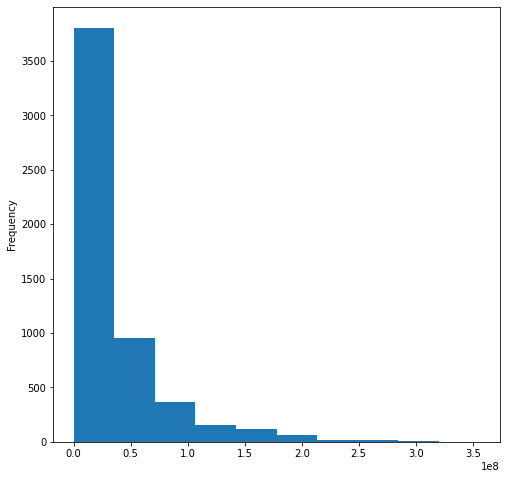

In [32]:
data['budget'].plot(kind = 'hist', figsize = (8,8));

In [33]:
.5 * 100000000

50000000.0

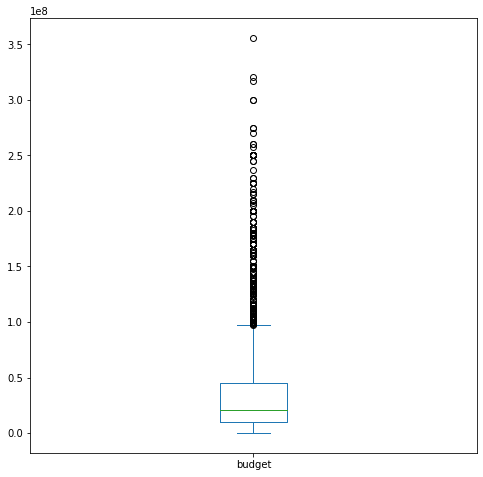

In [34]:
data['budget'].plot(kind = 'box', figsize = (8,8));

Budget column has outliers so we will use median

In [35]:
median_budget = data['budget'].median()

In [36]:
median_budget

20500000.0

In [37]:
# Fill null values with median

data['budget'].fillna(median_budget, inplace = True)

In [38]:
data.isnull().sum()

name          0
rating        0
genre         0
year          0
released      0
score         0
votes         0
director      0
writer        0
star          0
country       0
budget        0
gross       186
company      15
runtime       2
dtype: int64

How to deal with Gross Column?
fillna with median or mean>

we will check if there is outliers in this column to descide if we will use mean or median to fill null values

In [39]:
data['gross'].mean()

78509817.05685619

In [40]:
data['gross'].median()

20208496.0

In [41]:
data['gross'].describe()

count    7.475000e+03
mean     7.850982e+07
std      1.657516e+08
min      3.090000e+02
25%      4.549607e+06
50%      2.020850e+07
75%      7.601669e+07
max      2.847246e+09
Name: gross, dtype: float64

<AxesSubplot:>

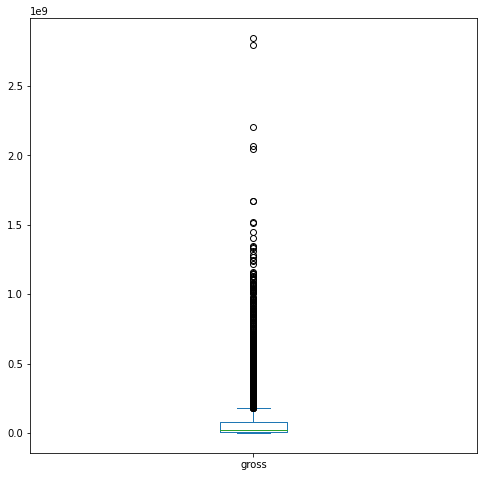

In [42]:
data['gross'].plot(kind = 'box', figsize = (8,8))

so we use median as there are outliers

In [43]:
median_gross = round(data['gross'].median(),2)

In [44]:
# Fill null values with median

data['gross'].fillna(median_gross, inplace = True)

In [45]:
data.isnull().sum()

name         0
rating       0
genre        0
year         0
released     0
score        0
votes        0
director     0
writer       0
star         0
country      0
budget       0
gross        0
company     15
runtime      2
dtype: int64

In [46]:
data['company'].nunique()

2380

In [47]:
# Drop Null Values

data.dropna(subset = ['company'], axis = 0, inplace = True)

In [48]:
data.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     2
dtype: int64

In [49]:
mean_runtime = round(data['runtime'].mean())

In [50]:
# Fill Null Values

data['runtime'].fillna(mean_runtime, inplace = True)

In [51]:
data.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

### Duplicated Rows

In [52]:
# Check if there are any duplicated rows

data.duplicated().sum()

0

there is no duplicated rows here, but if we find any duplicates we can use the coming pandas code: 

In [53]:
data.drop_duplicates(inplace = True)

In [54]:
data.duplicated().sum()

0

In [55]:
# this data has some incorrect data type so we load it to learn how to fix incorrect data type


chicago = pd.read_csv(r'C:\Users\ycc\Run Code\Other Code\practpy\chicago.csv')

In [56]:
chicago.head()

,Unnamed: 0,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year
0,1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992.0
1,955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992.0
2,9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981.0
3,304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986.0
4,45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975.0


In [57]:
chicago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     300000 non-null  int64  
 1   Start Time     300000 non-null  object 
 2   End Time       300000 non-null  object 
 3   Trip Duration  300000 non-null  int64  
 4   Start Station  300000 non-null  object 
 5   End Station    300000 non-null  object 
 6   User Type      300000 non-null  object 
 7   Gender         238948 non-null  object 
 8   Birth Year     238981 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 20.6+ MB


In [58]:
# change data type of Start Time column to be datetime type

chicago['Start Time'] = pd.to_datetime(chicago['Start Time'])

In [59]:
chicago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     300000 non-null  int64         
 1   Start Time     300000 non-null  datetime64[ns]
 2   End Time       300000 non-null  object        
 3   Trip Duration  300000 non-null  int64         
 4   Start Station  300000 non-null  object        
 5   End Station    300000 non-null  object        
 6   User Type      300000 non-null  object        
 7   Gender         238948 non-null  object        
 8   Birth Year     238981 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 20.6+ MB


In [60]:
# change data type of Start Time column to be datetime type

chicago['End Time'] = pd.to_datetime(chicago['End Time'])

In [61]:
chicago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     300000 non-null  int64         
 1   Start Time     300000 non-null  datetime64[ns]
 2   End Time       300000 non-null  datetime64[ns]
 3   Trip Duration  300000 non-null  int64         
 4   Start Station  300000 non-null  object        
 5   End Station    300000 non-null  object        
 6   User Type      300000 non-null  object        
 7   Gender         238948 non-null  object        
 8   Birth Year     238981 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(2), object(4)
memory usage: 20.6+ MB


###### Important Note:

when trying to transfer and correct data type you should be sure that there are no null value in the column before transfer data, if you try to do that with null values you we get an Error Message.

you can Ignore the error message by adding "errors="ignore" but the column data type will stay unchanged

In [62]:
chicago['Birth Year'] = chicago['Birth Year'].astype("int64", errors="ignore")

In [63]:
chicago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     300000 non-null  int64         
 1   Start Time     300000 non-null  datetime64[ns]
 2   End Time       300000 non-null  datetime64[ns]
 3   Trip Duration  300000 non-null  int64         
 4   Start Station  300000 non-null  object        
 5   End Station    300000 non-null  object        
 6   User Type      300000 non-null  object        
 7   Gender         238948 non-null  object        
 8   Birth Year     238981 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(2), object(4)
memory usage: 20.6+ MB


Here we will drop null values so we can change the data type

In [64]:
# Drop Null Values

chicago.dropna(subset =['Birth Year'],axis = 0 ,inplace = True )

In [65]:
chicago['Birth Year'] = chicago['Birth Year'].astype("int64", errors="ignore")

In [66]:
chicago.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238981 entries, 0 to 299999
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     238981 non-null  int64         
 1   Start Time     238981 non-null  datetime64[ns]
 2   End Time       238981 non-null  datetime64[ns]
 3   Trip Duration  238981 non-null  int64         
 4   Start Station  238981 non-null  object        
 5   End Station    238981 non-null  object        
 6   User Type      238981 non-null  object        
 7   Gender         238948 non-null  object        
 8   Birth Year     238981 non-null  int64         
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 18.2+ MB


###### There is another step that can face us while cleaning data: Un correct column name

we will use data about breast cancer that we will correct columns name

In [67]:
# load Breast cancer data

cancer_data = pd.read_csv("C:\\Users\\ycc\\Run Code\\Other Code\\practpy\\data.csv")

In [68]:
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


we will change columns'names to be without "_mean"

In [69]:
new_columns = []
for column in cancer_data.columns:
    if "_mean" in column:
        column = column[:-5]
        new_columns.append(column)
    else:
        new_columns.append(column)

print(new_columns)

['id', 'diagnosis', 'radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave points', 'symmetry', 'fractal_dimension', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']


In [70]:
cancer_data.columns = new_columns

In [71]:
cancer_data.head(10)

,id,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [72]:
# Drop the last column "Unnamed: 32" as it's un useful

cancer_data.drop(labels =["Unnamed: 32"], axis = 1, inplace = True)

In [73]:
cancer_data.head()

,id,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# so we done now
##### I hope this notebook helps you to explore data wrangling with python:
1) Data Assessing and Exploring

2) Data Cleaning